# Building DL Models using Sequential and Functional API in keras

Importing data

In [4]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras import layers
import sklearn.datasets
df = sklearn.datasets.fetch_california_housing(as_frame=True)

In [5]:
df.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.frame.shape

(20640, 9)

In [8]:
type(df)

sklearn.utils.Bunch

Normalizing the data

In [9]:
from sklearn.preprocessing import MinMaxScaler

features = df.frame.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df.frame)
len(df)

20640

In [10]:
# creating dataframe
data = pd.DataFrame(df,columns=features)

Splitting the dataset into Train and Test

In [11]:
x = data.drop(["MedHouseVal"],axis=1)
y = data["MedHouseVal"]
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

##Sequential API

In [12]:
model_seq = tf.keras.Sequential()

model_seq.add(layers.InputLayer(8,name="InputLayer"))
model_seq.add(layers.Dense(30,activation="relu",name="HiddenLayer1"))
model_seq.add(layers.Dense(1,activation="linear",name="OutputLayer"))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_seq.compile(loss="MeanAbsoluteError",optimizer=opt,metrics=["MSE"])

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 30)                270       
                                                                 
 OutputLayer (Dense)         (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


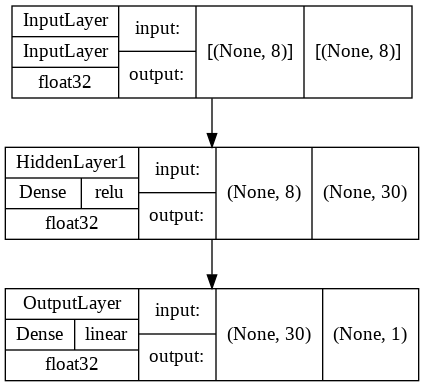

In [13]:
tf.keras.utils.plot_model(model_seq,
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

In [14]:
history_seq = model_seq.fit(x_train,y_train,
                            batch_size=32,
                            epochs=20,
                            validation_split=0.15)

Epoch 1/20
439/439 [==============================] - 4s 3ms/step - loss: 0.2882 - MSE: 0.1426 - val_loss: 0.1929 - val_MSE: 0.0671
Epoch 2/20
439/439 [==============================] - 1s 3ms/step - loss: 0.1856 - MSE: 0.0602 - val_loss: 0.1759 - val_MSE: 0.0556
Epoch 3/20
439/439 [==============================] - 1s 3ms/step - loss: 0.1610 - MSE: 0.0457 - val_loss: 0.1424 - val_MSE: 0.0380
Epoch 4/20
439/439 [==============================] - 1s 3ms/step - loss: 0.1316 - MSE: 0.0326 - val_loss: 0.1240 - val_MSE: 0.0313
Epoch 5/20
439/439 [==============================] - 1s 3ms/step - loss: 0.1191 - MSE: 0.0281 - val_loss: 0.1162 - val_MSE: 0.0276
Epoch 6/20
439/439 [==============================] - 1s 3ms/step - loss: 0.1140 - MSE: 0.0262 - val_loss: 0.1134 - val_MSE: 0.0259
Epoch 7/20
439/439 [==============================] - 1s 3ms/step - loss: 0.1120 - MSE: 0.0253 - val_loss: 0.1119 - val_MSE: 0.0258
Epoch 8/20
439/439 [==============================] - 1s 3ms/step - loss: 0.

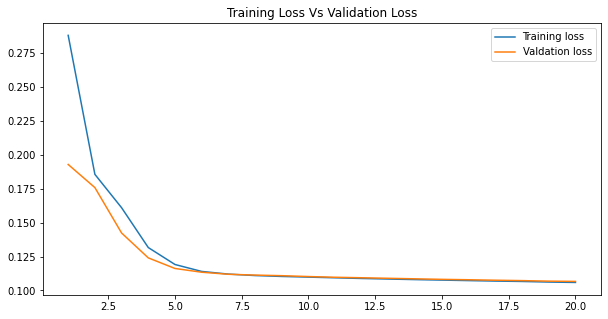

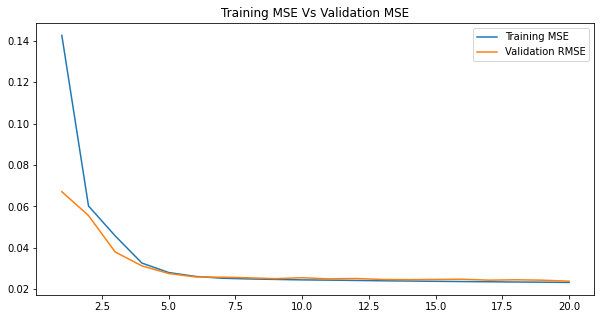

In [15]:
loss = history_seq.history['loss']
acc = history_seq.history['MSE']
val_loss = history_seq.history['val_loss']
val_acc = history_seq.history['val_MSE']

epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Valdation loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training MSE')
plt.plot(epochs, val_acc, label='Validation RMSE')
plt.title("Training MSE Vs Validation MSE")
plt.legend()
plt.show()

There is almost no gap between Train vs Validation curve for both Loss and MSE. Also the MSE is very low. Hence this is a Good model since it doesn't overfit the data.

In [16]:
model_seq.evaluate(x_test,y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.1061 - MSE: 0.0238


[0.10611139982938766, 0.023759596049785614]

##Functional API

In [17]:
inputA = tf.keras.Input(shape=(5,),name="InputA")
inputB = tf.keras.Input(shape=(6,),name="InputB")

hidden1 = layers.Dense(30, activation="relu")
x = hidden1(inputB)

hidden2 = layers.Dense(30, activation="relu")
x1 = hidden2(x)

concat_layer = tf.keras.layers.concatenate([inputA,x1],axis=1)

outputs = layers.Dense(1)(concat_layer)

In [18]:
model_func = tf.keras.Model(inputs=[inputA,inputB],outputs=outputs, name="Housing_price_Functional")

In [19]:
model_func.summary()

Model: "Housing_price_Functional"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputB (InputLayer)            [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['InputB[0][0]']                 
                                                                                                  
 InputA (InputLayer)            [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                           

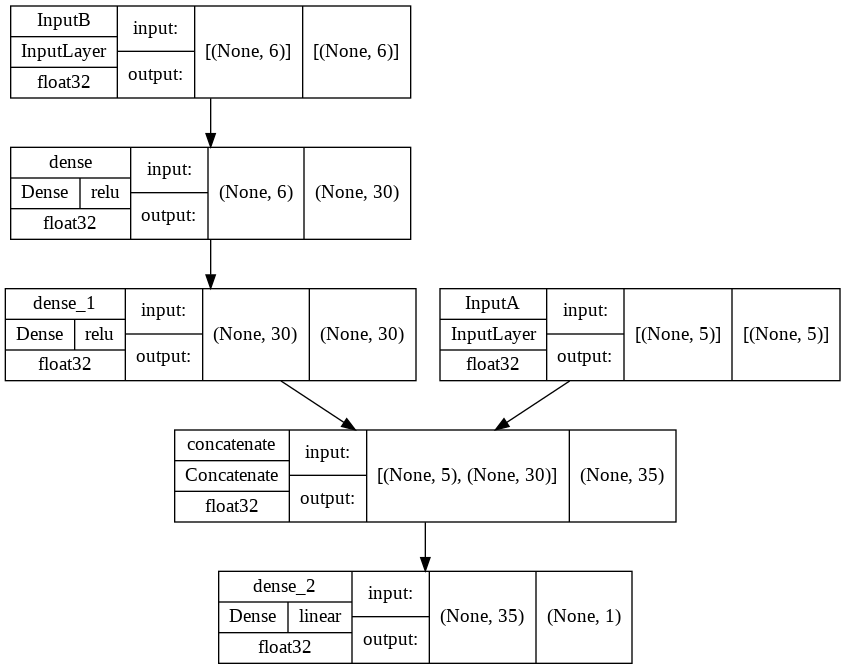

In [20]:
tf.keras.utils.plot_model(model_func,
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

In [21]:
model_func.compile(loss=["MAE"],
                   optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                   metrics=["MSE"])

In [22]:
featA = x_train.iloc[:,0:5]
featB = x_train.iloc[:,2:8]

hist_func = model_func.fit({"InputA": featA,"InputB":featB},y_train,batch_size=32,epochs=20, validation_split=0.15)

Epoch 1/20
439/439 [==============================] - 2s 3ms/step - loss: 0.2799 - MSE: 0.1376 - val_loss: 0.2083 - val_MSE: 0.0790
Epoch 2/20
439/439 [==============================] - 1s 3ms/step - loss: 0.2066 - MSE: 0.0764 - val_loss: 0.2038 - val_MSE: 0.0750
Epoch 3/20
439/439 [==============================] - 1s 3ms/step - loss: 0.2017 - MSE: 0.0731 - val_loss: 0.1986 - val_MSE: 0.0728
Epoch 4/20
439/439 [==============================] - 1s 3ms/step - loss: 0.1962 - MSE: 0.0700 - val_loss: 0.1928 - val_MSE: 0.0687
Epoch 5/20
439/439 [==============================] - 1s 3ms/step - loss: 0.1897 - MSE: 0.0662 - val_loss: 0.1857 - val_MSE: 0.0653
Epoch 6/20
439/439 [==============================] - 1s 3ms/step - loss: 0.1818 - MSE: 0.0618 - val_loss: 0.1781 - val_MSE: 0.0592
Epoch 7/20
439/439 [==============================] - 2s 4ms/step - loss: 0.1741 - MSE: 0.0574 - val_loss: 0.1704 - val_MSE: 0.0552
Epoch 8/20
439/439 [==============================] - 2s 5ms/step - loss: 0.

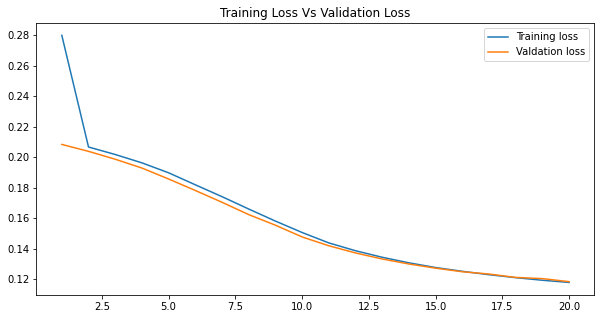

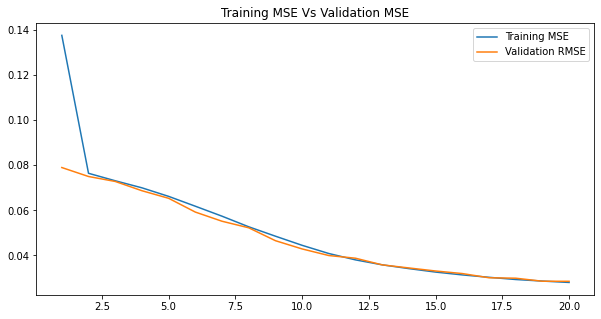

In [23]:
loss = hist_func.history['loss']
acc = hist_func.history['MSE']
val_loss = hist_func.history['val_loss']
val_acc = hist_func.history['val_MSE']

epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Valdation loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training MSE')
plt.plot(epochs, val_acc, label='Validation RMSE')
plt.title("Training MSE Vs Validation MSE")
plt.legend()
plt.show()

Train vs Validation curve for both Loss and MSE overlaps. The MSE and loss is quite low. Hence this is also a Good model since it doesn't overfit the data.

In [24]:
feat_test_A = x_test.iloc[:,0:5]
feat_test_B = x_test.iloc[:,2:8]
model_func.evaluate({"InputA":feat_test_A,"InputB":feat_test_B},y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.1155 - MSE: 0.0273


[0.11552836745977402, 0.027324622496962547]

In [25]:
print("Sequential Model Test MSE: 0.0238")
print("Functional Model Test MSE: 0.0273")

Sequential Model Test MSE: 0.0238
Functional Model Test MSE: 0.0273


The MSE is low for the test cases of both the Models. Both the models are a Good fit to this dataset.